EUROPEAN CLIMATE ASSESSMENT & DATASET (ECA&D), file created on: 19-06-2022. \
THESE DATA CAN BE USED FOR NON-COMMERCIAL RESEARCH AND EDUCATION PROVIDED THAT THE FOLLOWING SOURCE IS ACKNOWLEDGED: 

Klein Tank, A.M.G. and Coauthors, 2002. Daily dataset of 20th-century surface
air temperature and precipitation series for the European Climate Assessment. \
Int. J. of Climatol., 22, 1441-1453. \
Data and metadata available at http://www.ecad.eu

FILE FORMAT (MISSING VALUE CODE = -9999):

01-06 STAID: Station identifier \
08-13 SOUID: Source identifier \
15-22 DATE : Date YYYYMMDD \
24-28 TG   : Mean temperature in 0.1 &#176;C \
30-34 Q_TG : quality code for TG (0='valid'; 1='suspect'; 9='missing') 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
df = pd.read_csv('data_small/TG_STAID000001.txt', skiprows=20, parse_dates=['    DATE'])
df.head()

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0


In [3]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

## Statistics

In [4]:
df.describe()

,STAID,SOUID,TG,Q_TG
count,59321.0,59321.000000,59321.000000,59321.000000
mean,1.0,35381.008901,-991.150065,0.943426
std,0.0,0.462106,3083.274487,2.756902
min,1.0,35381.000000,-9999.000000,0.000000
25%,1.0,35381.000000,-13.000000,0.000000
50%,1.0,35381.000000,46.000000,0.000000
75%,1.0,35381.000000,123.000000,0.000000
max,1.0,35405.000000,262.000000,9.000000


In [5]:
# missing temperature records
df.loc[df['   TG']== -9999]

,STAID,SOUID,DATE,TG,Q_TG
45,1,35381,1860-02-15,-9999,9
70,1,35381,1860-03-11,-9999,9
251,1,35381,1860-09-08,-9999,9
525,1,35381,1861-06-09,-9999,9
539,1,35381,1861-06-23,-9999,9
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


<AxesSubplot:>

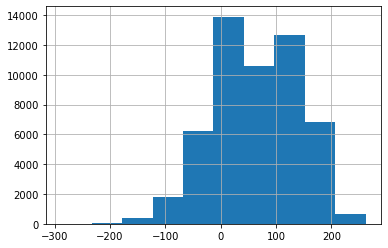

In [6]:
# histogram of temperature
df.loc[df['   TG']!= -9999]['   TG'].hist()

In [7]:
df.loc[df['    DATE']== '1981-03-05']['   TG'].squeeze()

-61

In [8]:
df.loc[df['   TG']== df['   TG'].max()]['    DATE'].squeeze()

Timestamp('1868-08-16 00:00:00')

In [9]:
df.iloc[3,3]

37

In [10]:
df.loc[3,'   TG']

37

In [11]:
df['TG'] = df['   TG'].mask(df['   TG']== -9999, np.nan)
df['TG'] = df['TG'] / 10
df.head()

,STAID,SOUID,DATE,TG,Q_TG,TG
0,1,35381,1860-01-01,21,0,2.1
1,1,35381,1860-01-02,46,0,4.6
2,1,35381,1860-01-03,31,0,3.1
3,1,35381,1860-01-04,37,0,3.7
4,1,35381,1860-01-05,31,0,3.1


## Visualization

<AxesSubplot:xlabel='    DATE'>

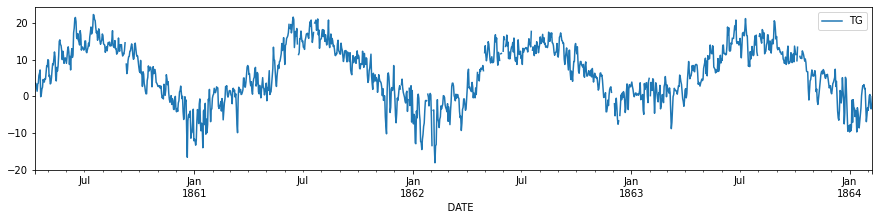

In [12]:
df[100:1500].plot(x='    DATE', y='TG', figsize=(15,3))